<a href="https://colab.research.google.com/github/rudrakant22sep/EVA/blob/Session_4/Assignment_4_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Taking Assignment 3 final Code "RudraKant_Assignment3__1st DNN___RESUBMIT.ipynb" as I/p here 
-- Total params: 16,108
-- Trainable params: 15,896
-- Non-trainable params: 212
-- Accuracy: [0.03483385611221311, 0.989]



**CHANGE # 1**
- removed off BatchNorm and DropRate from the code
-- Total params: 15,684
-- Trainable params: 15,684
-- Non-trainable params: 0
- Receieved the score: [0.043643074760204764, 0.987]
- also had 32, 16, MP, 16 16, 16, 16, 16 and Flatten/ Softmax

**CHANGE # 2**
- change the kernel sizes to:-
-- 28,28,1         ---> 32                                ---> RF (3x3), o/p shape (26x26x32)
-- 26,26,32       ---> 64 | 128 | 256 | 512  ---> RF (11x11), o/p shape (18x18x512)
-- 18x18x512  ---> MP                              ---> RF 22x22, o/p shape (9x9x512)
-- 9x9x512      ---> 1x1 and 32 of those ---> 9x9x32
-- 9x9x32        ---> 64 | 128 | 256 | 512   ---> RF 28x28, o/p: 1x1x512


- Total params: 3,157,226
-- Trainable params: 3,157,226
-- Non-trainable params: 0
- [1.4134399389266967, 0.3934]


**CHANGE # 2.1**
- change the kernel sizes to:-
-- 28,28,1         ---> 32                                ---> RF (3x3), o/p shape (26x26x32)
-- 26,26,32       ---> 64 | 128 | 256            ---> RF (9x9), o/p shape (20x20x256)
-- 20x20x256  ---> MP                              ---> RF 18x18, o/p shape (10x10x256)
-- 10x10x256  ---> 1x1 and 32 of those ---> 10x10x32
-- 10x10x32    ---> 64 | 128 | 256             ---> RF 24x24, o/p: 4x4x256
-- 4x4x256      ---> 1x1 and 10 of those ---> 4x4x10
-- 4x4x10        --> 4x4 and 10 of those  ---> 1x1x10


- Total params: 787,764
-- Trainable params: 787,764
-- Non-trainable params: 0
- [0.0324602926693231, 0.9915]



**CHANGE 2.2**
- 32 | 64 | 128 | MP | 1x1 | 32 | 64 | 128 | 1x1x10 | O/p layer: conv -- flatten -- activation
- Total params: 195,352
-- Trainable params: 195,352
-- Non-trainable params: 0
- [0.027670406887089483, 0.9912]



**CHANGE 2.3**
- 32 | 64 | 128 | MP | 1x1 | 32 | 64 | 128 | 1x1x32 | conv64 | o/p layer: conv -- flatten -- activation
- Total params: 214,936
-- Trainable params: 214,936
-- Non-trainable params: 0
- [0.03810903527473711, 0.989]


**CHANGE 2.4**

- 32 | 64 | 128 | MP | 1x1x64 | 64 | 64 | 1x1x32 | 32 | 1x1x10  --> O/P layer -- conv5x5 --activation
- Total params: 184,168
-- Trainable params: 184,168
-- Non-trainable params: 0
- [0.03215297475233674, 0.9892]

**CHANGE 2.5**
- 28x28x1 --> 3x3x16 | 3x3x32 | 3x3x64 | MP | 1x1x16 | 3x3x32 | 3x3x64 | 1x1x16 | 3x3x16 | 1x1x10 | O/p Layer 5x5x10 -- activation
- Total params: 53,512
-- Trainable params: 53,512
-- Non-trainable params: 0
- [0.033571184229488606, 0.9918]


*here I realized that 64 channels are the ones which are maximum contributing to parameters

**CHANGE 2.6**
- 28x8x1 --> 3x3x16 | 3x3x32 | 3x3x32 | MP | 1x1x16 | 3x3x32 | 3x3x32 |1x1x16 | 3x3x32 | 1x1x10 --> o/p Layer -- Conv 5x5x10 -- activation
- Total params: 36,472
-- Trainable params: 36,472
-- Non-trainable params: 0
- [0.029193071796320146, 0.9914]



**CHANGE 2.7**
- 28x28x1 ---> 3x3x16 | 3x3x16 | 3x3x16 | MP | 1x1x16 | 3x3x16 | 3x3x16 | 1x1x16 | 3x3x16 | 1x1x10 --> O/p Layer -- 5x5x10 -- activation
- Total params: 14,984
-- Trainable params: 14,984
-- Non-trainable params: 0
- [0.03264557908709976, 0.9907]

**So, we will finalize the architecture in 2.7 above

from keras.layers import Activation
model = Sequential()
droprate=0.11


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


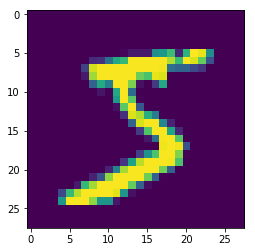

In [23]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [26]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
from keras.layers import Activation
model = Sequential()
droprate=0.11


# Initial Block
##Input shape (28 X 28 X 1) 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
            # RF  (3 X 3), O/p: (26 X 26 X 16)


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF: 5X5, o/p: 24X24X16
model.add(Convolution2D(16,3,3, activation = 'relu')) # RF: 7x7, o/p: 22x22x16


# Transition Block
model.add(MaxPooling2D(2,2))                          # RF: 14x14, o/p: 11x11x16
model.add(Convolution2D(16,1,1, activation = 'relu')) # RF: 14x14, o/p: 11x11x16


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF:16x16, o/p: 9x9x16
model.add(Convolution2D(16,3,3, activation = 'relu')) # RF:18x18, o/p: 7x7x16


# Transition Block
model.add(Convolution2D(16, 1, 1, activation='relu'))  # RF: 18x18, o/p: 7x7x16


# Convolution Block
model.add(Convolution2D(16,3,3, activation = 'relu'))  # RF:20x20, o/p: 5x5x16


# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu'))  # RF: 20x20, o/p: 5x5x10

# O/P layer
model.add(Convolution2D(10, 5,5))                      # RF: 20x20, o/p: 1x1x10
model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 16)        272       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.2703 - acc: 0.9146
Epoch 2/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0904 - acc: 0.9724
Epoch 3/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0652 - acc: 0.9802
Epoch 4/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0546 - acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0466 - acc: 0.9856
Epoch 6/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0401 - acc: 0.9875
Epoch 7/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.0366 - acc: 0.9886
Epoch 8/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0331 - acc: 0.9898
Epoch 9/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.0308 - acc: 0.9905
Epoch 10/10
60000/60000 [==============================] - 26s 438us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [34]:
print(score)

[0.03502637046401506, 0.9893]


In [0]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred[:9])
print(y_test[:9])

[[2.34921589e-14 2.11336655e-08 1.18886106e-07 7.56691065e-07
  7.13232804e-13 2.97180835e-09 4.51413624e-20 9.99999046e-01
  5.82917936e-10 1.79445987e-08]
 [2.43673730e-06 5.39758602e-08 9.99997020e-01 1.79362289e-10
  1.97489570e-16 1.65598482e-14 4.17390567e-07 3.77026382e-16
  3.06065971e-11 6.92694810e-20]
 [1.51206319e-08 9.99706566e-01 5.82676137e-07 3.21900160e-08
  3.20192021e-06 6.97313453e-07 5.54883115e-07 2.87812669e-04
  5.90397462e-07 1.72023586e-08]
 [9.98147964e-01 2.95209670e-08 1.41452142e-06 2.73355187e-08
  2.28388841e-09 3.77403381e-07 1.84903550e-03 1.71109099e-10
  1.15806040e-06 1.82366211e-09]
 [5.13335763e-10 9.21225407e-09 9.06181015e-08 3.21252358e-08
  9.99950409e-01 2.53787107e-08 1.01837841e-07 5.09451992e-09
  4.27617124e-08 4.93565531e-05]
 [5.30490674e-09 9.99765813e-01 1.51775623e-07 3.39042860e-09
  5.35389631e-07 5.01792350e-08 5.92988378e-08 2.33321334e-04
  8.70183783e-08 9.14525788e-09]
 [1.07885402e-10 8.33353079e-06 4.99842145e-07 1.12928278e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

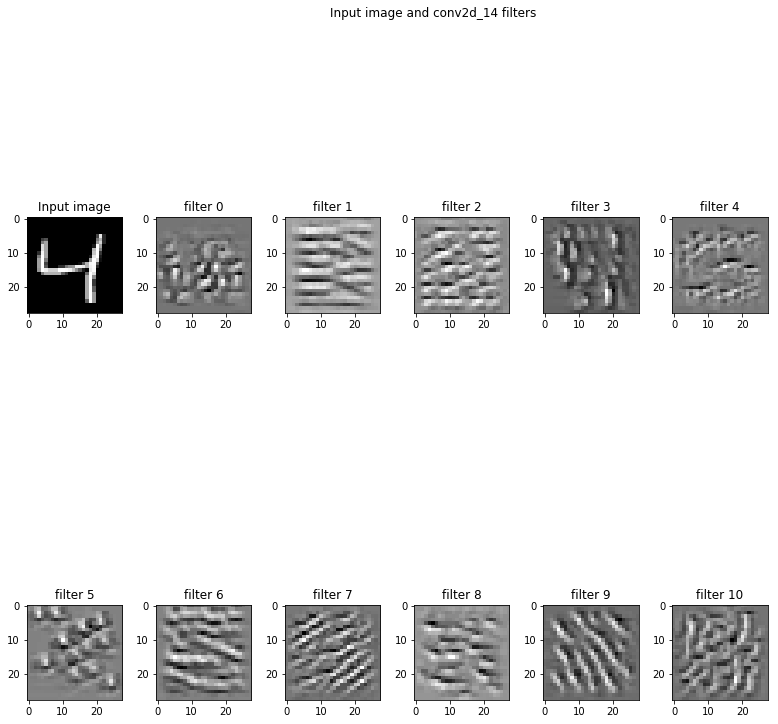

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()